In [1]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%config InlineBackend.figure_format = 'retina'

A look at how and why we make the classes the way we do

Lets say we have some random targets, basically continuous over a range

In [66]:
targets = np.random.uniform(-0.040,0.040, (10000,1))

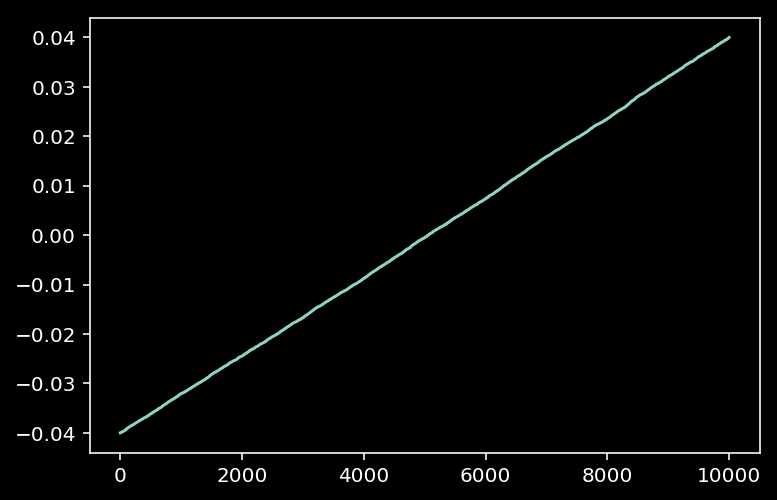

In [67]:
plt.plot(sorted(targets))

Currently the first step to get the classes is round then take the absolute value, and round again. lets see what that looks like, and what each component of that does.

In [68]:
#if self.precision == 0.005:
rounded_targets = np.asarray([np.round(abs(np.round(d * 2,2)/2), 5) for d in targets]).reshape(-1)

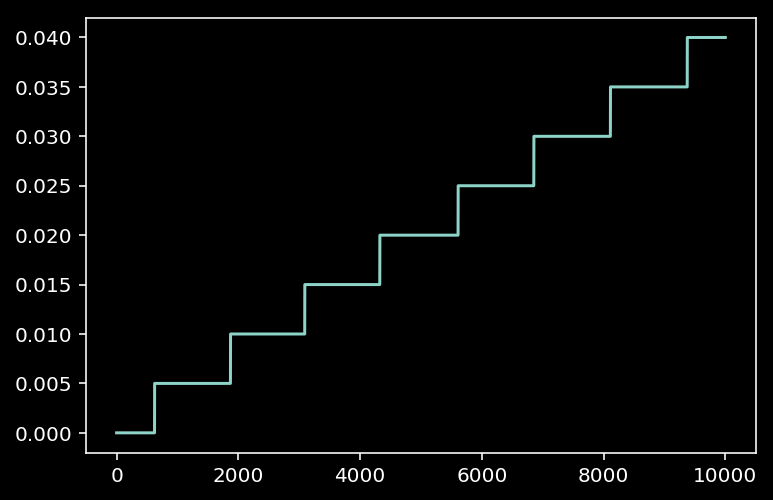

In [69]:
plt.plot(sorted(rounded_targets));

steps! The idea here is each step becomes its own class/label for a NN classifer.

so what is this line doing?
`rounded_targets = np.asarray([np.round(abs(np.round(d * 2,2)/2), 5) for d in targets]).reshape(-1)`

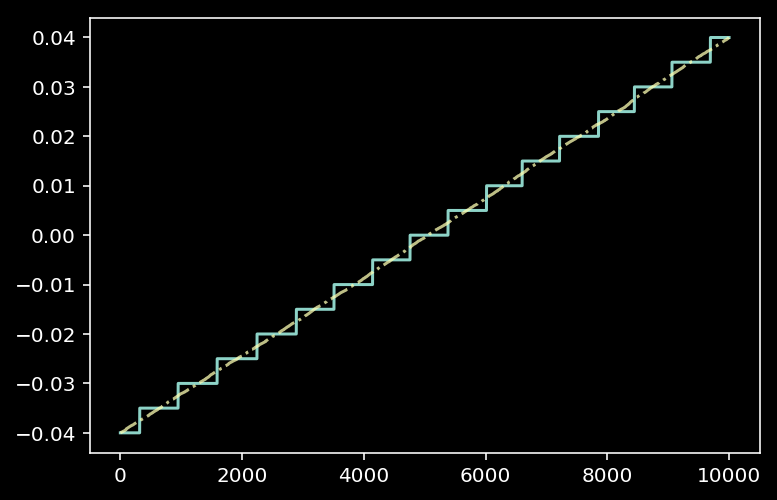

In [70]:
inner_round = np.asarray([np.round(d * 2,2)/2 for d in targets]).reshape(-1)
plt.plot(sorted(inner_round));
plt.plot(sorted(targets), ls = '-.', alpha = 0.75);

In [71]:
#Some values from inner round
np.random.choice(inner_round, 5)

array([ 0.   ,  0.035, -0.02 ,  0.035,  0.025])

The desired precsision here is `0.005`, and the inner round achieves that with `np.round(d * 2,2)/2` It doubles the values `d`, rounds them to 2 places, then divides that by 2 

In [72]:
d = np.random.choice(targets.reshape(-1),1)[0]
print(d)
print(d*2)
print(np.round(d*2, 2))
print(np.round(d*2, 2)/2)

-0.03456969208914786
-0.06913938417829572
-0.07
-0.035


Magic 🧙‍♂️

We have a classifer that does a very good job of determining postive phase from negative, so we discard the sign

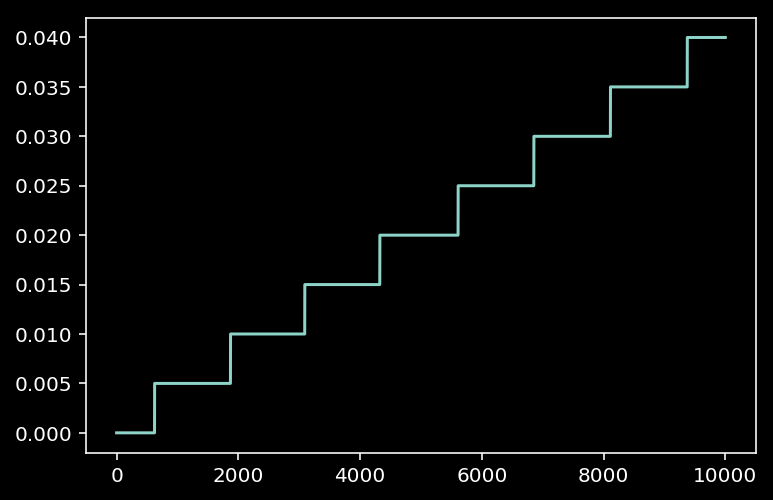

In [73]:
abs_inner_round = np.asarray([abs(np.round(d * 2,2)/2) for d in targets]).reshape(-1)
plt.plot(sorted(abs_inner_round));

Now, why the heck do we round *again* in rounded targets? Float / key problems.

Lets take that outer round out and see why.

In [74]:
rounded_targets_no_outer_round = np.asarray([abs(np.round(d * 2,2)/2) for d in targets]).reshape(-1)

In [75]:
precision = 0.005

# All the different possible classes or steps
classes = np.arange(0,0.04 + precision, precision)

We use the classes to generate class labels (one-hot vectors) like so:

In [76]:
eye = np.eye(len(classes), dtype = int)
classes_labels = {}
for i, key in enumerate(classes):
    classes_labels[np.round(key,5)] = eye[i].tolist()

In [77]:
classes_labels

{0.0: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 0.005: [0, 1, 0, 0, 0, 0, 0, 0, 0],
 0.01: [0, 0, 1, 0, 0, 0, 0, 0, 0],
 0.015: [0, 0, 0, 1, 0, 0, 0, 0, 0],
 0.02: [0, 0, 0, 0, 1, 0, 0, 0, 0],
 0.025: [0, 0, 0, 0, 0, 1, 0, 0, 0],
 0.03: [0, 0, 0, 0, 0, 0, 1, 0, 0],
 0.035: [0, 0, 0, 0, 0, 0, 0, 1, 0],
 0.04: [0, 0, 0, 0, 0, 0, 0, 0, 1]}

Makes sense, each class is a key for a 
one-hot label

In [78]:
labels = [classes_labels[x] for x in rounded_targets_no_outer_round]

No problem, so why did we round again? Higher precisions screw this up.

Lets do the same exact process but with precision 0.001 (10ns) insted of 0.005 (50ns)

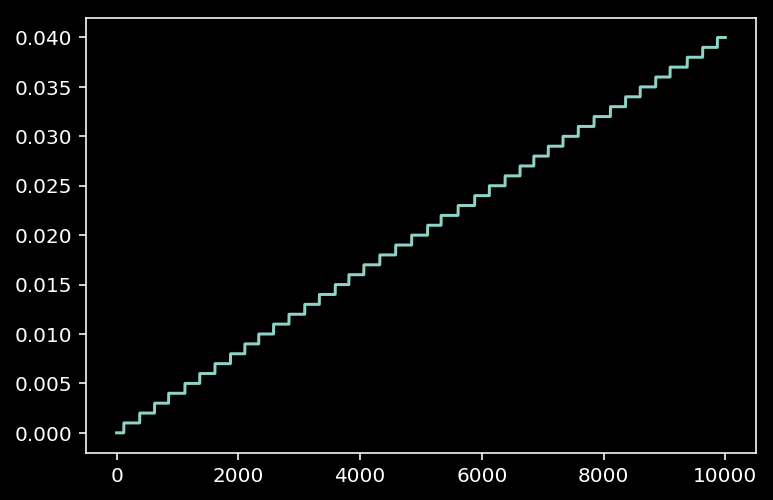

In [79]:
precision = 0.001

# All the different possible classes or steps
classes = np.arange(0,0.04 + precision, precision)

eye = np.eye(len(classes), dtype = int)
classes_labels = {}
for i, key in enumerate(classes):
    classes_labels[np.round(key,5)] = eye[i].tolist()

# for 5 times great precision we multiply value in the inner round by an extra 5 and divide the inner round also by an extra factor of 5
rounded_targets_no_outer_round = np.asarray([abs(np.round(d * 2*5,2)/(2*5)) for d in targets]).reshape(-1)
plt.plot(sorted(rounded_targets_no_outer_round))

More steps

In [80]:
labels = [classes_labels[x] for x in rounded_targets_no_outer_round]

KeyError: 0.014000000000000002

?

In [81]:
sorted(classes_labels.keys())

[0.0,
 0.001,
 0.002,
 0.003,
 0.004,
 0.005,
 0.006,
 0.007,
 0.008,
 0.009,
 0.01,
 0.011,
 0.012,
 0.013,
 0.014,
 0.015,
 0.016,
 0.017,
 0.018,
 0.019,
 0.02,
 0.021,
 0.022,
 0.023,
 0.024,
 0.025,
 0.026,
 0.027,
 0.028,
 0.029,
 0.03,
 0.031,
 0.032,
 0.033,
 0.034,
 0.035,
 0.036,
 0.037,
 0.038,
 0.039,
 0.04]

The keys are rounded when the are generated (`classes_labels[np.round(key,5)] = eye[i].tolist()`). The values in `rounded_targets_no_outer_round` dont match the keys.

In [82]:
for val in rounded_targets_no_outer_round:
    if val not in classes_labels.keys():
        print(val)
        break

0.014000000000000002


Why dont we just not round the keys? Same problem, some values wont match, because floats. So we round

In [83]:
rounded_targets = np.asarray([np.round(abs(np.round(d * 2*5,2)/(2*5)), 5) for d in targets]).reshape(-1)
labels = [classes_labels[x] for x in rounded_targets]

Awesome

***

Want higher precision? Just multiple the factors like above

In [90]:
# base precision = 0.005, 9 classes
rounded_targets_005 = np.asarray([np.round(abs(np.round(d * 2,2)/(2)), 5) for d in targets]).reshape(-1)

# 5 times greater precision than base = 0.001, 41 classes
f = 5
rounded_targets_001 = np.asarray([np.round(abs(np.round(d * 2*f,2)/(2*f)), 5) for d in targets]).reshape(-1)

# 10 times greater precision than base = 0.0005, 81 classes
f = 10
rounded_targets_0005 = np.asarray([np.round(abs(np.round(d * 2*f,2)/(2*f)), 5) for d in targets]).reshape(-1)

# 20 times greater precision than base = 0.00025, 161 classes
f = 20
rounded_targets_00025 = np.asarray([np.round(abs(np.round(d * 2*f,2)/(2*f)), 5) for d in targets]).reshape(-1)

# 50 times greater precision than base = 0.0001, 401 classes
f = 50
rounded_targets_0001 = np.asarray([np.round(abs(np.round(d * 2*f,2)/(2*f)), 5) for d in targets]).reshape(-1)




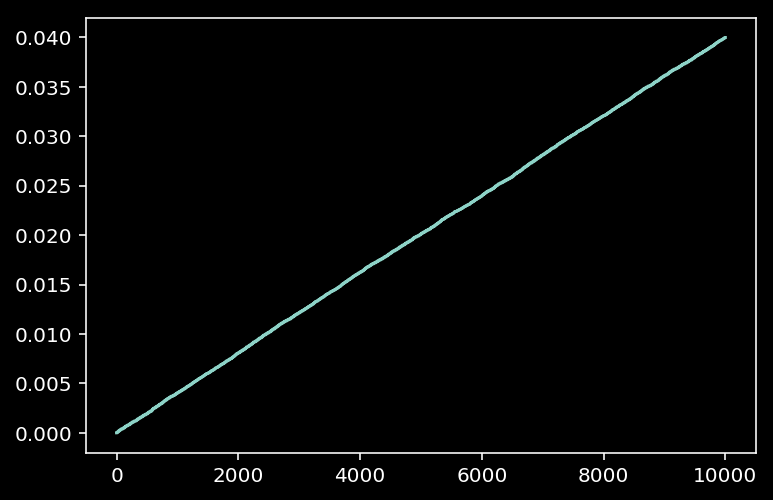

In [98]:
plt.plot(sorted(rounded_targets_0001));

In [94]:
precision = 0.0001

# All the different possible classes or steps
classes = np.arange(0,0.04 + precision, precision)

eye = np.eye(len(classes), dtype = int)
classes_labels = {}
for i, key in enumerate(classes):
    classes_labels[np.round(key,5)] = eye[i].tolist()

labels = [classes_labels[x] for x in rounded_targets_0001]

In [97]:
len(classes_labels.keys())

401

In [96]:
np.random.choice(rounded_targets_0001, 5)

array([0.0237, 0.0168, 0.0397, 0.0152, 0.0135])

Note, ive never had asuccessfly network with precision = 0.0001. maybe too many classes?

0.00025 works pretty well

***

Why absolute value?

 - I just assumed it would be easier for the network. Lets make a class for no abosolute value

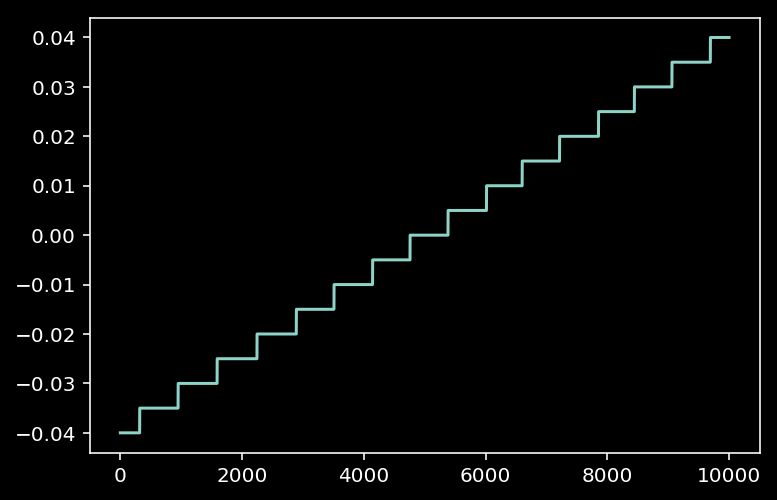

In [99]:
#if self.precision == 0.005:
rounded_targets = np.asarray([np.round(np.round(d * 2,2)/2, 5) for d in targets]).reshape(-1)
plt.plot(sorted(rounded_targets));

In [105]:
precision = 0.005

# All the different possible classes or steps
classes = np.arange(-0.04,0.04 + precision, precision)

eye = np.eye(len(classes), dtype = int)
classes_labels = {}
for i, key in enumerate(classes):
    classes_labels[np.round(key,5)] = eye[i].tolist()
labels = [classes_labels[x] for x in rounded_targets]

In [106]:
len(classes_labels.keys())

17

The problem with not taking the absolute value is that it doubles the number of classes.

In [123]:
f = 1
rounded_targets = np.asarray([np.round(np.round(d * 2*f,2)/(2*f), 5) for d in targets]).reshape(-1)

precision = 0.005

# All the different possible classes or steps
classes = np.arange(-0.04,0.04 + precision, precision)

eye = np.eye(len(classes), dtype = int)
classes_labels = {}
for i, key in enumerate(classes):
    classes_labels[np.round(key,5)] = eye[i].tolist()
labels = [classes_labels[x] for x in rounded_targets]

In [124]:
len(classes_labels.keys())

17